# An√°lisis de Sentimientos de Opiniones Tur√≠sticas

Este notebook realiza un an√°lisis de sentimientos sobre las opiniones tur√≠sticas recopiladas bas√°ndose en las calificaciones de estrellas (1-5) para evaluar la percepci√≥n de los visitantes sobre diferentes atracciones tur√≠sticas.

## Objetivos:
- Cargar dataset de una ciudad espec√≠fica
- Crear una nueva columna 'Sentimiento' basada en las calificaciones (1-5 estrellas)
- Mapear calificaciones a tres categor√≠as: Positivo, Neutro, Negativo
- Generar estad√≠sticas descriptivas de los sentimientos
- Mostrar ejemplos representativos de cada categor√≠a de sentimiento

In [1]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar los m√≥dulos de an√°lisis de sentimientos (nueva estructura modular)
import sys
sys.path.append('../scripts')
from sentimientos import (
    AnalizadorCalificaciones, 
    cargar_dataset_ciudad, 
    mostrar_info_dataset
)

# Configuraci√≥n de visualizaci√≥n
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("‚úÖ Librer√≠as importadas correctamente")
print("‚úÖ M√≥dulo de an√°lisis de sentimientos cargado (nueva estructura modular)")
print("üìÅ Usando: sentimientos/analizador_calificaciones.py")

‚úÖ Librer√≠as importadas correctamente
‚úÖ M√≥dulo de an√°lisis de sentimientos cargado (nueva estructura modular)
üìÅ Usando: sentimientos/analizador_calificaciones.py


In [2]:
# Ruta actualizada para la nueva estructura de datos
dataset_path = '../data/processed/datasets_por_ciudad/dataset_cancun.csv'

# Cargar los datos
df = pd.read_csv(dataset_path)
print(f"üìä Dataset cargado: {dataset_path}")
print(f"üìà Dimensiones: {df.shape}")
print(f"üèôÔ∏è  Ciudad: {df['Ciudad'].iloc[0] if 'Ciudad' in df.columns else 'No especificada'}")
print(f"üìù Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

# Mostrar las primeras filas
display(df.head())

üìä Dataset cargado: ../data/processed/datasets_por_ciudad/dataset_cancun.csv
üìà Dimensiones: (700, 10)
üèôÔ∏è  Ciudad: Cancun
üìù Columnas disponibles:
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview


Titulo  \
0                         Divertido y emocionante   
1                                       Incre√≠ble   
2                Xochimilco excelente experiencia   
3                 Xoximilco increible experiencia   
4  Xochimilco tiene el mejor ambiente de fiesta!!   

                                              Review TipoViaje  Calificacion  \
0  Se organiz√≥ el transporte. La recepci√≥n en el ...    Pareja             5   
1  Ninguno, me encant√≥ toda la experiencias fue i...    Pareja             5   
2  Joss y Roberto dieron muy buen servicio y ambi...    Pareja             5   
3  Fue una experiencia maravillosa el ambiente de...    Amigos             5   
4  Fui con mis amigos a celebrar mi cumplea√±os y ...    Amigos             5   

     OrigenAutor FechaOpinion FechaEstadia  Ciudad  \
0        anonimo   2025-08-31   2025-08-01  Cancun   
1        anonimo   2025-08-28   2025-08-01  Cancun   
2        anonimo   2025-08-22   2025-08-01  Cancun   
3        anonimo   2025-08-21   2025-08-01  Cancun   
4  Mar√≠a Elena F   2025-08-19   2025-08-01  Cancun   

                    Atraccion  \
0  Xoximilco Cancun By Xcaret   
1  Xoximilco Cancun By Xcaret   
2  Xoximilco Cancun By Xcaret   
3  Xoximilco Cancun By Xcaret   
4  Xoximilco Cancun By Xcaret   

                                        TituloReview  
0  Divertido y emocionante Se organiz√≥ el transpo...  
1  Incre√≠ble Ninguno, me encant√≥ toda la experien...  
2  Xochimilco excelente experiencia Joss y Robert...  
3  Xoximilco increible experiencia Fue una experi...  
4  Xochimilco tiene el mejor ambiente de fiesta!!...

In [3]:
# Inicializar el analizador de sentimientos (nueva clase modular)
analizador = AnalizadorCalificaciones()

print("üõ†Ô∏è Analizador de sentimientos inicializado correctamente")
print("üìÅ Usando: AnalizadorCalificaciones (nueva estructura modular)")
print("üìã Mapeo de calificaciones:")
print("   ‚Ä¢ 4-5 estrellas ‚Üí Positivo")
print("   ‚Ä¢ 3 estrellas ‚Üí Neutro") 
print("   ‚Ä¢ 1-2 estrellas ‚Üí Negativo")

üõ†Ô∏è Analizador de sentimientos inicializado correctamente
üìÅ Usando: AnalizadorCalificaciones (nueva estructura modular)
üìã Mapeo de calificaciones:
   ‚Ä¢ 4-5 estrellas ‚Üí Positivo
   ‚Ä¢ 3 estrellas ‚Üí Neutro
   ‚Ä¢ 1-2 estrellas ‚Üí Negativo


In [4]:
# Aplicar el an√°lisis de sentimientos al dataset
df = analizador.procesar_sentimientos_dataset(df)

# Mostrar una muestra del resultado
print("\n" + "="*60)
print("MUESTRA DEL DATASET CON SENTIMIENTOS")
print("="*60)
display(df[['TituloReview', 'Calificacion', 'Sentimiento']].head(8))

üîÑ Creando columna 'Sentimiento' basada en las calificaciones...
‚úÖ Columna 'Sentimiento' creada exitosamente
üìä Total de registros procesados: 700

MUESTRA DEL DATASET CON SENTIMIENTOS


TituloReview  Calificacion Sentimiento
0  Divertido y emocionante Se organiz√≥ el transpo...             5    Positivo
1  Incre√≠ble Ninguno, me encant√≥ toda la experien...             5    Positivo
2  Xochimilco excelente experiencia Joss y Robert...             5    Positivo
3  Xoximilco increible experiencia Fue una experi...             5    Positivo
4  Xochimilco tiene el mejor ambiente de fiesta!!...             5    Positivo
5  Cumplea√±os especial! Fuimos a celebrar el cump...             5    Positivo
6  Recomendado Visitamos este lugar para celebrar...             5    Positivo
7  Xoximilco Experience We had the pleasure of me...             5    Positivo

In [5]:
# Generar y mostrar estad√≠sticas descriptivas de los sentimientos
estadisticas = analizador.obtener_estadisticas_sentimientos(df)

# Mostrar estad√≠sticas en consola
analizador.mostrar_estadisticas_consola(estadisticas)

# Mostrar tablas detalladas
print("\n" + "="*60)
print("üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN")
print("="*60)
display(estadisticas['tabla_cruzada'])

print("\nüéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):")
print("-" * 50)
display(estadisticas['por_atraccion'].head(10))

üìä ESTAD√çSTICAS DESCRIPTIVAS DE SENTIMIENTOS
üî¢ DISTRIBUCI√ìN DE SENTIMIENTOS:
----------------------------------------
  Positivo: 550 registros ( 78.6%)
    Neutro:  75 registros ( 10.7%)
  Negativo:  75 registros ( 10.7%)

üìà TOTAL DE REGISTROS: 700

üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN


Calificacion   1   2   3    4    5  All
Sentimiento                            
Negativo      56  19   0    0    0   75
Neutro         0   0  75    0    0   75
Positivo       0   0   0  139  411  550
All           56  19  75  139  411  700


üéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):
--------------------------------------------------


Sentimiento                                         Negativo  Neutro  Positivo
Atraccion                                                                     
Acuario Interactivo                                       15       8        44
Avenida Kukulkan                                           2       8        62
La Isla                                                   11      12        47
Las Plazas Outlet Cancun                                  15      24        33
Museo Maya De Cancun Y Zona Arqueologica De San...         3       6        55
Playa Delfines                                             4       2        64
Playa Tortugas                                            12      11        48
Puerto Maya Cancun                                         2       0        71
Ventura Park                                               9       4        59
Xoximilco Cancun By Xcaret                                 2       0        67

üìà GENERANDO VISUALIZACIONES DE SENTIMIENTOS
‚úÖ Visualizaciones generadas exitosamente


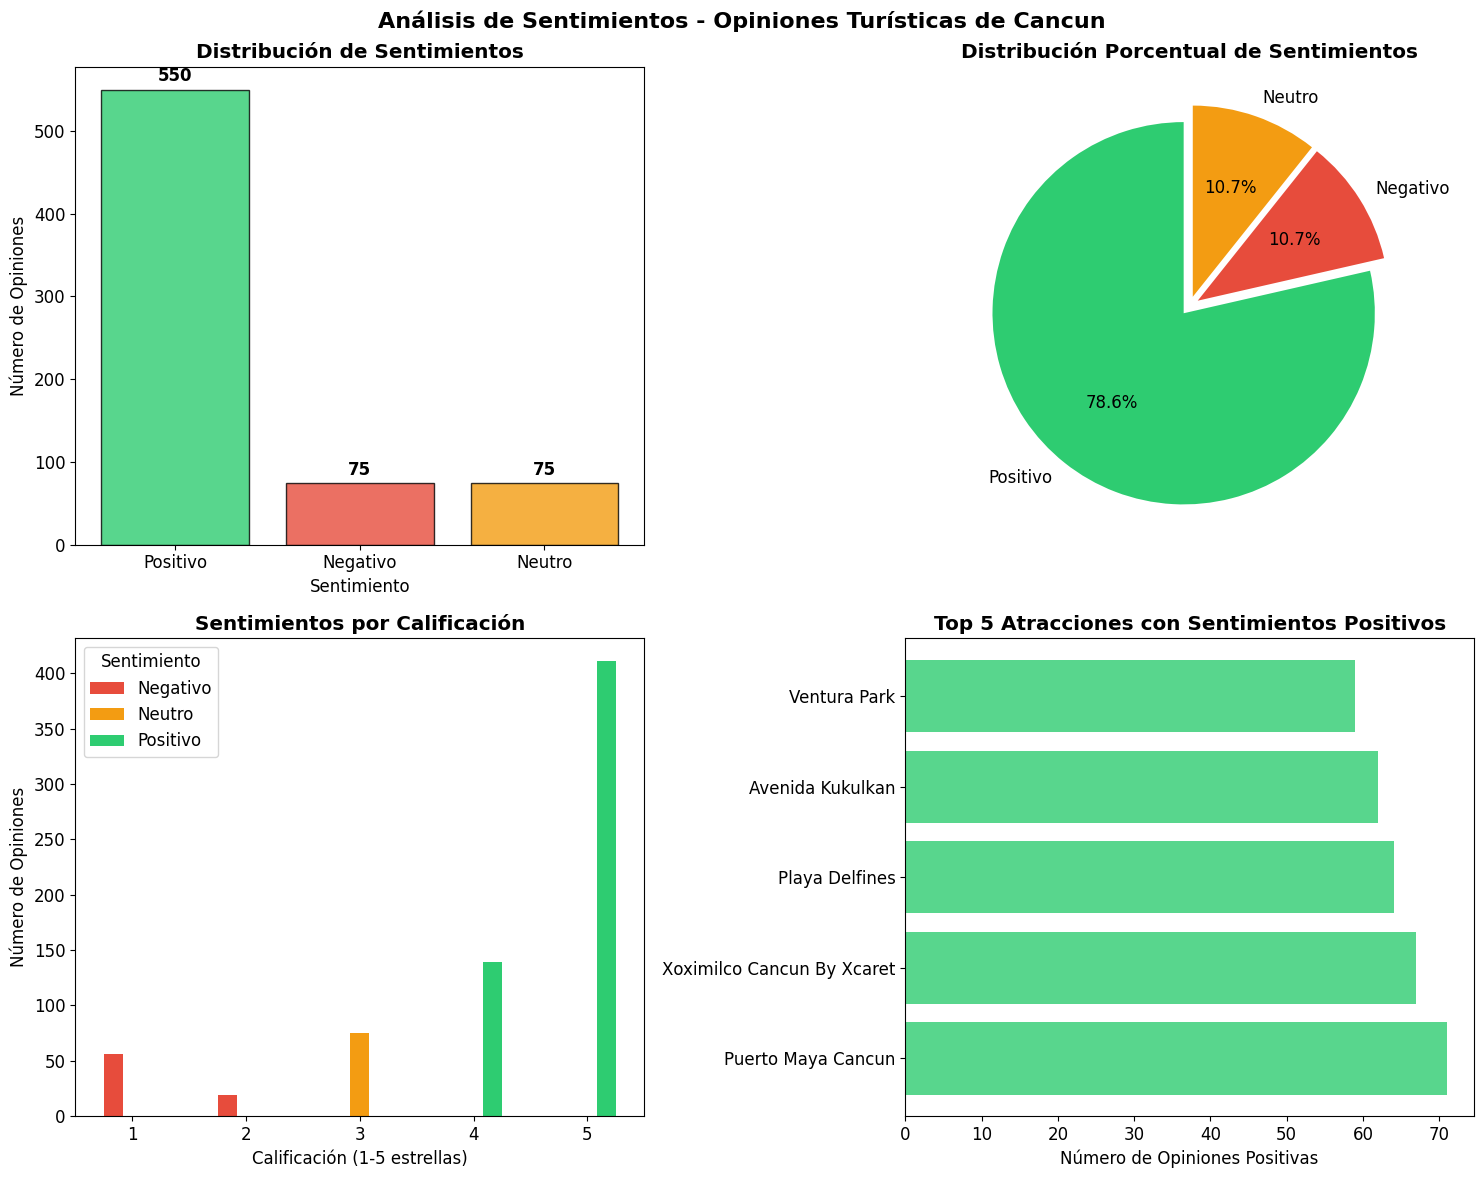

‚úÖ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)


In [6]:
# Crear visualizaciones de los sentimientos (usando el nuevo visualizador modular)
from sentimientos import VisualizadorSentimientos

visualizador = VisualizadorSentimientos()
ciudad = df['Ciudad'].iloc[0]
fig = visualizador.crear_visualizaciones_basicas(df, ciudad)
plt.show()

print("‚úÖ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)")

In [7]:
# Mostrar ejemplos representativos de cada sentimiento
analizador.mostrar_todos_los_ejemplos(df, n_ejemplos=3)

# Generar resumen final
analizador.generar_resumen_final(df)

üìù EJEMPLOS REPRESENTATIVOS DE CADA SENTIMIENTO

üéØ EJEMPLOS DE SENTIMIENTO POSITIVO
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Playa Tortugas
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2024-03-01
   üí¨ Opini√≥n: "Vista incre√≠ble Hermoso lugar con incre√≠ble agua cristalina! Playa Tortugas est√° ubicada en Canc√∫n, justo al noroeste de la Zona Hotelera, y se puede acceder a ella en autob√∫s o en auto de alquiler. T..."
   --------------------------------------------------

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Playa Tortugas
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2022-08-01
   üí¨ Opini√≥n: "SIN SARGAZO Muy bonita playa, no encontramos nada de sargazo,hay restaurantes para comer, tienen variedad en sus platillos y es muy facil de llegar"
   --------------------------------------------------

üìå Ejemplo 3:
   üèõÔ∏è Atracci√≥n: Puerto Maya Cancun
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2025-08-01
   üí¨ Opini√≥n: "U

# An√°lisis de Sentimientos con Modelos Preentrenados de HuggingFace

En esta segunda parte del an√°lisis, utilizaremos modelos preentrenados de HuggingFace para clasificar sentimientos bas√°ndose en el contenido textual de las opiniones, y luego compararemos estos resultados con la clasificaci√≥n basada en calificaciones de estrellas.

## Objetivos de esta secci√≥n:
- Cargar un modelo preentrenado de HuggingFace optimizado para an√°lisis de sentimientos
- Aplicar el modelo al contenido textual de las opiniones (columna `TituloReview`)
- Comparar los resultados obtenidos con la clasificaci√≥n basada en calificaciones
- Identificar concordancias y discordancias entre ambos m√©todos
- Analizar ejemplos donde los m√©todos difieren para entender mejor las diferencias

In [8]:
# Instalar e importar librer√≠as para modelos preentrenados
print("üì¶ Verificando librer√≠as necesarias para HuggingFace...")

try:
    import transformers
    print("‚úÖ Transformers ya est√° instalado")
except ImportError:
    print("‚è≥ Instalando transformers...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers[torch]"])
    print("‚úÖ Transformers instalado exitosamente")

# Importar el analizador de HuggingFace (nueva estructura modular)
from sentimientos import AnalizadorHuggingFace

print("‚úÖ Analizador de HuggingFace importado correctamente")
print("üìÅ Usando: sentimientos/analizador_huggingface.py")

üì¶ Verificando librer√≠as necesarias para HuggingFace...
‚úÖ Transformers ya est√° instalado
‚úÖ Analizador de HuggingFace importado correctamente
üìÅ Usando: sentimientos/analizador_huggingface.py


In [9]:
# Inicializar el analizador de HuggingFace (nueva clase modular)
print("ü§ñ Inicializando analizador de sentimientos con HuggingFace...")

# Usamos un modelo multiling√ºe optimizado para espa√±ol
# Este modelo funciona bien en hardware limitado (16GB RAM, 6 cores)
analizador_hf = AnalizadorHuggingFace(
    modelo_nombre="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Cargar el modelo
exito = analizador_hf.cargar_modelo()

if exito:
    print("üéØ Modelo recomendado para este hardware:")
    print("   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment")
    print("   ‚Ä¢ Tama√±o: ~400MB aproximadamente")
    print("   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)")
    print("   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as")
    print("üìÅ Usando: AnalizadorHuggingFace (nueva estructura modular)")
else:
    print("‚ùå No se pudo cargar el modelo de HuggingFace")

ü§ñ Inicializando analizador de sentimientos con HuggingFace...
ü§ñ Cargando modelo: nlptown/bert-base-multilingual-uncased-sentiment
‚è≥ Esto puede tomar unos momentos la primera vez...


Device set to use cuda:0


‚úÖ Modelo cargado exitosamente
üåç Modelo: nlptown/bert-base-multilingual-uncased-sentiment
üéØ Modelo recomendado para este hardware:
   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment
   ‚Ä¢ Tama√±o: ~400MB aproximadamente
   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)
   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as
üìÅ Usando: AnalizadorHuggingFace (nueva estructura modular)


In [10]:
# Aplicar an√°lisis de sentimientos con HuggingFace al dataset completo
print("üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...")
print("‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware")

# Procesar el dataset completo
df_con_hf = analizador_hf.procesar_dataset_completo(df, 'TituloReview')

print(f"\n‚úÖ An√°lisis con HuggingFace completado")
print(f"üìä Dataset ahora contiene {len(df_con_hf.columns)} columnas:")
print(f"   ‚Ä¢ Sentimiento (por calificaci√≥n)")
print(f"   ‚Ä¢ SentimientoHF (por modelo preentrenado)")

# Mostrar una muestra comparativa
print("\n" + "="*80)
print("MUESTRA COMPARATIVA DE AMBOS M√âTODOS")
print("="*80)
display(df_con_hf[['TituloReview', 'Calificacion', 'Sentimiento', 'SentimientoHF']].head(10))

üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...
‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware
üîÑ Procesando sentimientos con HuggingFace para 700 registros...
‚è≥ Esto puede tomar varios minutos...
   Procesando registro 1/700 (0.1%)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   Procesando registro 26/700 (3.7%)
   Procesando registro 51/700 (7.3%)
   Procesando registro 76/700 (10.9%)
   Procesando registro 101/700 (14.4%)
   Procesando registro 126/700 (18.0%)
   Procesando registro 151/700 (21.6%)
   Procesando registro 176/700 (25.1%)
   Procesando registro 201/700 (28.7%)
   Procesando registro 226/700 (32.3%)
   Procesando registro 251/700 (35.9%)
   Procesando registro 276/700 (39.4%)
   Procesando registro 301/700 (43.0%)
   Procesando registro 326/700 (46.6%)
   Procesando registro 351/700 (50.1%)
   Procesando registro 376/700 (53.7%)
   Procesando registro 401/700 (57.3%)
   Procesando registro 426/700 (60.9%)
   Procesando registro 451/700 (64.4%)
   Procesando registro 476/700 (68.0%)
   Procesando registro 501/700 (71.6%)
   Procesando registro 526/700 (75.1%)
   Procesando registro 551/700 (78.7%)
   Procesando registro 576/700 (82.3%)
   Procesando registro 601/700 (85.9%)
   Procesando registro 626/700 (89.4%)
   Procesando registro 651/700

TituloReview  Calificacion  \
0  Divertido y emocionante Se organiz√≥ el transpo...             5   
1  Incre√≠ble Ninguno, me encant√≥ toda la experien...             5   
2  Xochimilco excelente experiencia Joss y Robert...             5   
3  Xoximilco increible experiencia Fue una experi...             5   
4  Xochimilco tiene el mejor ambiente de fiesta!!...             5   
5  Cumplea√±os especial! Fuimos a celebrar el cump...             5   
6  Recomendado Visitamos este lugar para celebrar...             5   
7  Xoximilco Experience We had the pleasure of me...             5   
8  Genial. ¬°Lo mejor que he pasado en mucho tiemp...             5   
9  Noche mexicana de fiesta y diversi√≥n Ambiente ...             5   

  Sentimiento SentimientoHF  
0    Positivo      Positivo  
1    Positivo      Positivo  
2    Positivo      Positivo  
3    Positivo      Positivo  
4    Positivo      Positivo  
5    Positivo      Positivo  
6    Positivo      Positivo  
7    Positivo      Positivo  
8    Positivo      Positivo  
9    Positivo      Positivo

In [11]:
# Comparar los resultados de ambos m√©todos (usando el nuevo comparador modular)
from sentimientos import ComparadorSentimientos

print("üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS")
print("="*60)

# Inicializar el comparador
comparador = ComparadorSentimientos()

# Realizar comparaci√≥n estad√≠stica
comparacion = comparador.comparar_sentimientos(df_con_hf)

# Mostrar estad√≠sticas de comparaci√≥n
comparador.mostrar_comparacion(comparacion)

# Mostrar la tabla de confusi√≥n detallada
print("\nüìä TABLA DE CONFUSI√ìN DETALLADA:")
print("-" * 50)
display(comparacion['tabla_confusion'])

print("üìÅ Usando: ComparadorSentimientos (nueva estructura modular)")

üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS
üìä COMPARACI√ìN DE M√âTODOS DE AN√ÅLISIS DE SENTIMIENTOS
üéØ CONCORDANCIA GENERAL:
   ‚Ä¢ Total de registros: 700
   ‚Ä¢ Registros concordantes: 619
   ‚Ä¢ Porcentaje de concordancia: 88.4%

üìã ESTAD√çSTICAS POR SENTIMIENTO:
--------------------------------------------------

Positivo:
   üìä Por calificaci√≥n: 550 registros
   ü§ñ Por HuggingFace: 535 registros
   ‚úÖ Concordancia: 514 registros (93.5%)

Neutro:
   üìä Por calificaci√≥n: 75 registros
   ü§ñ Por HuggingFace: 57 registros
   ‚úÖ Concordancia: 30 registros (40.0%)

Negativo:
   üìä Por calificaci√≥n: 75 registros
   ü§ñ Por HuggingFace: 108 registros
   ‚úÖ Concordancia: 75 registros (100.0%)

üìä TABLA DE CONFUSI√ìN DETALLADA:
--------------------------------------------------


HuggingFace   Negativo  Neutro  Positivo  All
Calificaci√≥n                                 
Negativo            75       0         0   75
Neutro              24      30        21   75
Positivo             9      27       514  550
All                108      57       535  700

üìÅ Usando: ComparadorSentimientos (nueva estructura modular)


üìà VISUALIZACIONES DE COMPARACI√ìN


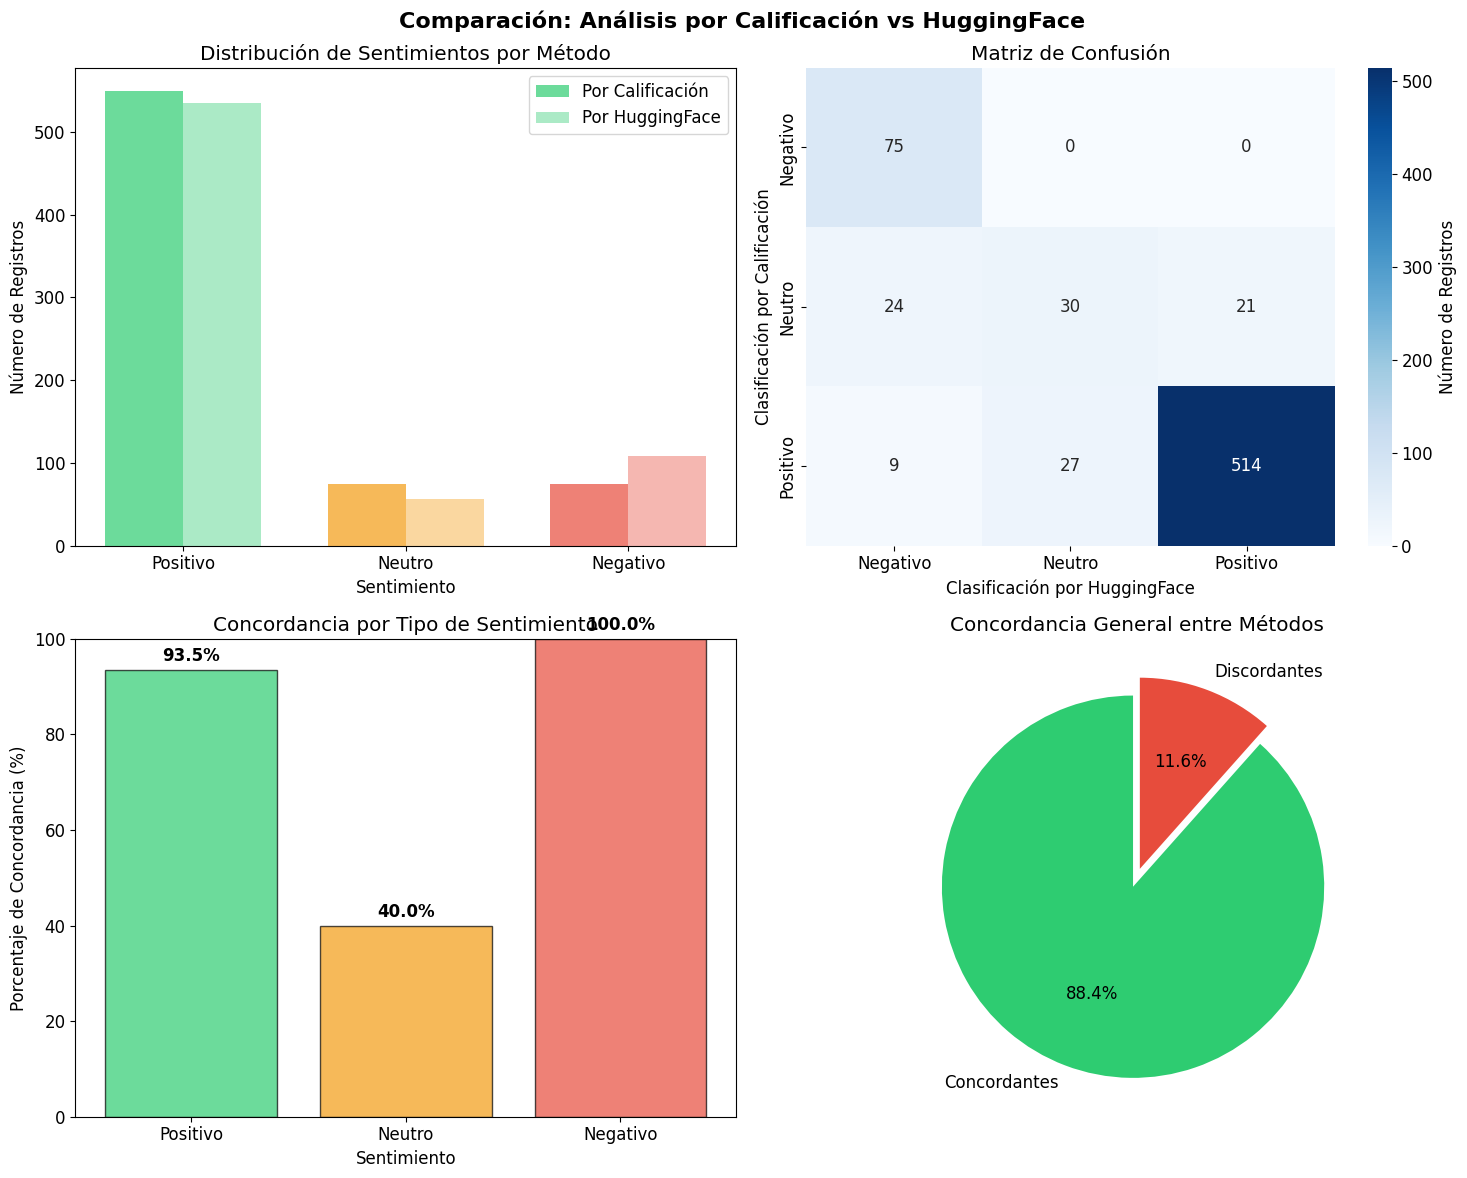

‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente
üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()


In [12]:
# Crear visualizaciones de comparaci√≥n entre ambos m√©todos
print("üìà VISUALIZACIONES DE COMPARACI√ìN")
print("="*50)

# Crear las visualizaciones usando el visualizador modular
fig_comparacion = visualizador.crear_visualizacion_comparacion(df_con_hf, comparacion)
plt.show()

print("‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente")
print("üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()")

In [13]:
# Mostrar ejemplos donde los m√©todos difieren
print("üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS")
print("="*70)

# Mostrar algunos ejemplos de discordancias (muestra limitada)
analizador_hf.mostrar_ejemplos_discordantes(df_con_hf, n_ejemplos=3)

print("\n" + "üîÑ" * 25 + " AN√ÅLISIS COMPLETO " + "üîÑ" * 25)

# üìã NUEVA FUNCIONALIDAD: Mostrar TODAS las discordancias completas
# Esta funci√≥n muestra el texto completo de todas las opiniones discordantes
print("\nüÜï Para ver TODAS las opiniones discordantes completas:")
discordantes_completas = analizador_hf.mostrar_todas_discordancias(df_con_hf)

# Calcular m√©tricas de precisi√≥n adicionales usando el comparador
metricas = comparador.calcular_metricas_precision(df_con_hf)
print("\nüìä M√âTRICAS DE PRECISI√ìN DETALLADAS:")
print("="*50)
comparador.mostrar_metricas_precision(metricas)

print("\n" + "="*70)
print("üìä RESUMEN FINAL DE LA COMPARACI√ìN")
print("="*70)
print(f"‚úÖ An√°lisis completado para {len(df_con_hf)} opiniones")
print(f"üèôÔ∏è Ciudad analizada: {df_con_hf['Ciudad'].iloc[0]}")
print(f"üéØ Atracciones √∫nicas: {df_con_hf['Atraccion'].nunique()}")
print(f"\nüìà M√©todos comparados:")
print(f"   ‚Ä¢ Clasificaci√≥n por calificaci√≥n (1-5 estrellas)")
print(f"   ‚Ä¢ Clasificaci√≥n por modelo preentrenado (HuggingFace)")
print(f"\nüîç Concordancia entre m√©todos: {comparacion['porcentaje_concordancia']:.1f}%")
print(f"üìä Casos discordantes: {len(df_con_hf) - comparacion['concordancia_total']} de {len(df_con_hf)}")

print(f"\nüí° EXTRA: Se han mostrado {len(discordantes_completas)} opiniones discordantes completas arriba")
print("üìã Cada opini√≥n se muestra sin cortes para an√°lisis detallado")
print("\nüèóÔ∏è ESTRUCTURA MODULAR UTILIZADA:")
print("   üìÅ sentimientos/analizador_calificaciones.py")
print("   üìÅ sentimientos/analizador_huggingface.py") 
print("   üìÅ sentimientos/visualizaciones_sentimientos.py")
print("   üìÅ sentimientos/comparador_sentimientos.py")

üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS
üîç EJEMPLOS DE DISCORDANCIAS ENTRE M√âTODOS
üìä Total de discordancias: 81/700 (11.6%)

üéØ Neutro (Calificaci√≥n) ‚Üí Negativo (HuggingFace): 24 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: La Isla
   ‚≠ê Calificaci√≥n: 3/5 ‚Üí Neutro
   ü§ñ HuggingFace: Negativo
   üí¨ Opini√≥n: "Ve al acuario si est√°s aburrido. De lo contrario, ahorre su dinero de taxi. No estoy seguro de qui√©nes son estas personas que dicen que el centro comercial es incre√≠ble. Mano a Dios, es solo meh. Honestamente dese√© haber ahorrado el dinero del taxi y haberme quedado en el resort.Un par de tiendas decentes, pero 1/3 de los espacios parecen vac√≠os. Fui alrededor de las 11 am con mi esposa y dos ni√±os peque√±os. El acuario estaba bien. Despu√©s del acuario, solo nos quedamos unos 15 o 20 minutos m√°s porque no hab√≠a mucho que ver."
   --------------------------------------------------

üìå 